##Задача 9.3


In [32]:
# encoding: utf-8
%matplotlib inline

from math import sqrt
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

N = 100

def generate(size=N):
    return norm.rvs(size=size)

#### а) Доверительный интервал для матожидания
Изобразим на графике зависимость доверительного интервала от размера выборки. Синий цвет соответствует известной дисперсии, красный -- неизвестной.

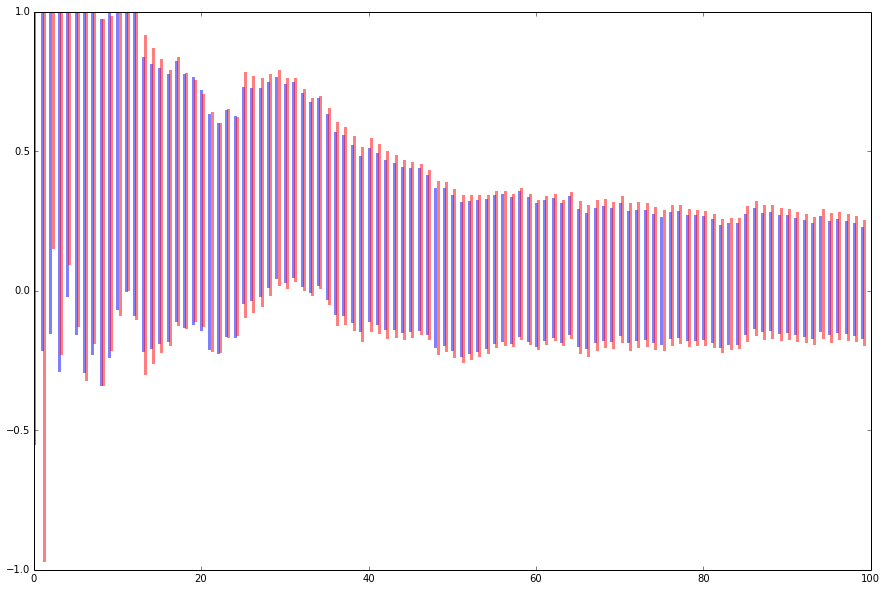

In [58]:
def confidence_interval_known_sigma(sample):
    z = norm.ppf(0.975)
    d = z / sqrt(len(sample))
    return (np.mean(sample) - d, np.mean(sample) + d)

def confidence_interval_unknown_sigma(sample):
    z = t.ppf(0.975, len(sample) - 1)
    d = z * np.std(sample) / sqrt(len(sample))
    return (np.mean(sample) - d, np.mean(sample) + d)

def draw(sample):
    plt.figure(figsize=(15,10))
    plt.axis([0, 100, -1, 1])
    for i in range(N):
        conf = confidence_interval_known_sigma(sample[:i+1])
        plt.plot([i, i], [conf[0], conf[1]], color='blue',
                 alpha=0.5, linewidth=3)
        conf = confidence_interval_unknown_sigma(sample[:i+1])
        plt.plot([i + 0.25, i + 0.25], [conf[0], conf[1]], color='red',
                 alpha=0.5, linewidth=3)
    plt.show()
    
draw(generate())

#### а) Доверительный интервал для $\sigma^2$
Изобразим на графике зависимость доверительного интервала от размера выборки. Синий цвет соответствует известному матожиданию, красный -- неизвестному.

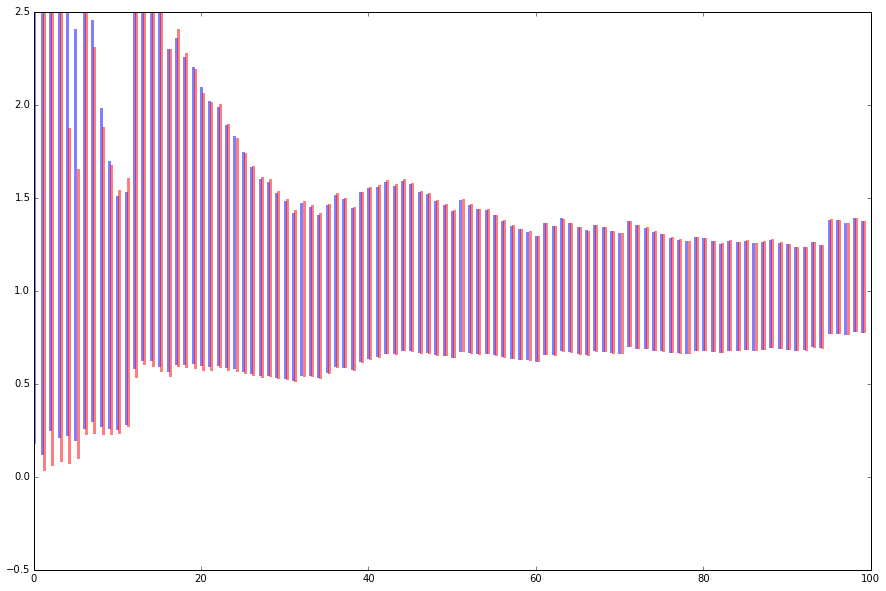

In [56]:
from scipy.stats import chi2

def confidence_interval_known_mu(sample):
    z = np.sum(np.square(sample))
    z1 = chi2.ppf((1.0 + 0.95) / 2, len(sample))
    z2 = chi2.ppf((1.0 - 0.95) / 2, len(sample))
    return (z / z1, z / z2)

def confidence_interval_unknown_mu(sample):
    z = (len(sample) - 1) * np.std(sample) ** 2
    z1 = chi2.ppf((1.0 + 0.95) / 2, len(sample) - 1)
    z2 = chi2.ppf((1.0 - 0.95) / 2, len(sample) - 1)
    return (z / z1, z / z2)


def draw(sample):
    plt.figure(figsize=(15,10))
    plt.axis([0, N, -0.5, 2.5])
    for i in range(N):
        conf = confidence_interval_known_mu(sample[:i+1])
        plt.plot([i, i], [conf[0], conf[1]], color='blue',
                 alpha=0.5, linewidth=3)
        conf = confidence_interval_unknown_mu(sample[:i+1])
        plt.plot([i + 0.25, i + 0.25], [conf[0], conf[1]], color='red',
                 alpha=0.5, linewidth=3)
    plt.show()
    
draw(generate())

Из графиков хорошо видно, что длина доверительного интервала тем меньше, чем больше размер выборки.